<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>AirBnB Listings and reviews</strong></h1>
</div>


<img src="https://cdn.shopify.com/s/files/1/0558/6413/1764/files/Airbnb_Logo_Design_History_Evolution_0_1024x1024.jpg?v=1692808408" width=800>

<div style="background-color:white; padding: 20px; border-radius: 10px;font-size:25px;font-weight:10px">
  <h1 style="color: #333;"><strong>Exploratory Data Analysis</strong></h1>
</div>


In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [185]:
review_dict=pd.read_csv(r"D:\python\Py_Project\Airbnb_Project_Dataset\Airbnb Data\Reviews_data_dictionary.csv")

In [186]:
review_dict

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Loading and Checking the dataset</strong></h1>
</div>

In [187]:
review=pd.read_csv(r"D:\python\Py_Project\Airbnb_Project_Dataset\Airbnb Data\Reviews.csv")

In [188]:
review.size

21492572

In [189]:
Listings_data_dictionary=pd.read_csv(r"D:\python\Py_Project\Airbnb_Project_Dataset\Airbnb Data\Listings_data_dictionary.csv")

In [190]:
Listings=pd.read_csv(r"D:\python\Py_Project\Airbnb_Project_Dataset\Airbnb Data\Listings.csv",
                   encoding="ISO-8859-1",low_memory=False )
# encoding ="ISO-8859-1" use the data is huge amount and array having mix data types

In [226]:
Listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [227]:
Listings

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [193]:
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [194]:
Listings["city"].value_counts()

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64

<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Columns and Rows Filtering</strong></h1>
</div>

In [195]:
paris_listings = Listings.query("city=='Paris'").loc[:,["listing_id","host_since","neighbourhood","city","accommodates","price"]]

<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Paris City Data Analysis</strong></h1>
</div>

In [196]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     64690 non-null  int64 
 1   host_since     64657 non-null  object
 2   neighbourhood  64690 non-null  object
 3   city           64690 non-null  object
 4   accommodates   64690 non-null  int64 
 5   price          64690 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.5+ MB


In [197]:
paris_listings.head()

,listing_id,host_since,neighbourhood,city,accommodates,price
0,281420,2011-12-03,Buttes-Montmartre,Paris,2,53
1,3705183,2013-11-29,Buttes-Montmartre,Paris,2,120
2,4082273,2014-07-31,Elysee,Paris,2,89
3,4797344,2013-12-17,Vaugirard,Paris,2,58
4,4823489,2014-12-14,Passy,Paris,2,60


<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Checking if there are missing values in the dataset</strong></h1>
</div>

In [198]:
paris_listings.isna().sum()

listing_id        0
host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [199]:
paris_listings.dropna(how="any",inplace=True)

In [200]:
paris_listings["host_since"]=pd.to_datetime(paris_listings["host_since"])

<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Information About the dataset</strong></h1>
</div>

In [201]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     64657 non-null  int64         
 1   host_since     64657 non-null  datetime64[ns]
 2   neighbourhood  64657 non-null  object        
 3   city           64657 non-null  object        
 4   accommodates   64657 non-null  int64         
 5   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.5+ MB


In [202]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.465700e+04,64657,64657.000000,64657.000000
mean,2.424035e+07,2015-11-01 11:06:05.528867328,3.037877,113.104614
min,2.577000e+03,2008-08-30 00:00:00,0.000000,0.000000
25%,1.181517e+07,2014-03-09 00:00:00,2.000000,59.000000
50%,2.395412e+07,2015-07-07 00:00:00,2.000000,80.000000
75%,3.721013e+07,2017-05-29 00:00:00,4.000000,120.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,12000.000000
std,1.432650e+07,NaN,1.588382,214.479626


In [203]:
paris_listings.describe(include="object")

,neighbourhood,city
count,64657,64657
unique,20,1
top,Buttes-Montmartre,Paris
freq,7232,64657


In [204]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.465700e+04,64657,64657.000000,64657.000000
mean,2.424035e+07,2015-11-01 11:06:05.528867328,3.037877,113.104614
min,2.577000e+03,2008-08-30 00:00:00,0.000000,0.000000
25%,1.181517e+07,2014-03-09 00:00:00,2.000000,59.000000
50%,2.395412e+07,2015-07-07 00:00:00,2.000000,80.000000
75%,3.721013e+07,2017-05-29 00:00:00,4.000000,120.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,12000.000000
std,1.432650e+07,NaN,1.588382,214.479626


find zeros in price and accommodates to ise bollean mass

In [205]:
paris_listings[paris_listings["price"]==0 ].count()#boolean mass

listing_id       62
host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [206]:
paris_listings[paris_listings["accommodates"]==0 ].count()

listing_id       54
host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

use condition find in price and accomodates how many zeros in both sides

In [207]:
paris_listings[(paris_listings["price"]==0) & (paris_listings["accommodates"] !=0)]

,listing_id,host_since,neighbourhood,city,accommodates,price
207075,41740617,2019-07-22,Vaugirard,Paris,2,0
207076,42535325,2019-10-31,Enclos-St-Laurent,Paris,2,0
208301,41740616,2019-05-27,Palais-Bourbon,Paris,2,0
208302,42279245,2019-07-19,Pantheon,Paris,3,0
208854,42431400,2016-09-16,Louvre,Paris,3,0
208855,42534842,2019-11-06,Luxembourg,Paris,3,0
208856,42534894,2019-12-02,Elysee,Paris,3,0
208857,42583396,2019-12-17,Opera,Paris,2,0


drop the zeros using != in boolean mass

In [208]:
paris_listings=paris_listings[paris_listings["price"]!=0 ]

In [209]:
paris_listings.describe(include="object")

,neighbourhood,city
count,64595,64595
unique,20,1
top,Buttes-Montmartre,Paris
freq,7230,64595


<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Finding average Price of AirBnB in Paris as per Localities</strong></h1>
</div>

In [210]:
paris_listings_neighbourhood=paris_listings.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price",ascending=False)

In [211]:
paris_listings_neighbourhood

,price
neighbourhood,
Elysee,211.373651
Louvre,175.754448
Passy,161.290875
Palais-Bourbon,157.514464
Luxembourg,155.794589
Bourse,149.633577
Hotel-de-Ville,144.515228
Temple,138.429300
Pantheon,122.983599


In [212]:
type(paris_listings_neighbourhood)

pandas.core.frame.DataFrame

In [213]:
paris_listings.describe()

,listing_id,host_since,accommodates,price
count,6.459500e+04,64595,64595.000000,64595.000000
mean,2.422116e+07,2015-10-30 22:46:09.985293056,3.040483,113.213174
min,2.577000e+03,2008-08-30 00:00:00,1.000000,8.000000
25%,1.180597e+07,2014-03-09 00:00:00,2.000000,59.000000
50%,2.392314e+07,2015-07-06 00:00:00,2.000000,80.000000
75%,3.719008e+07,2017-05-25 00:00:00,4.000000,120.000000
max,4.809185e+07,2021-02-07 00:00:00,16.000000,12000.000000
std,1.431989e+07,NaN,1.586691,214.553894


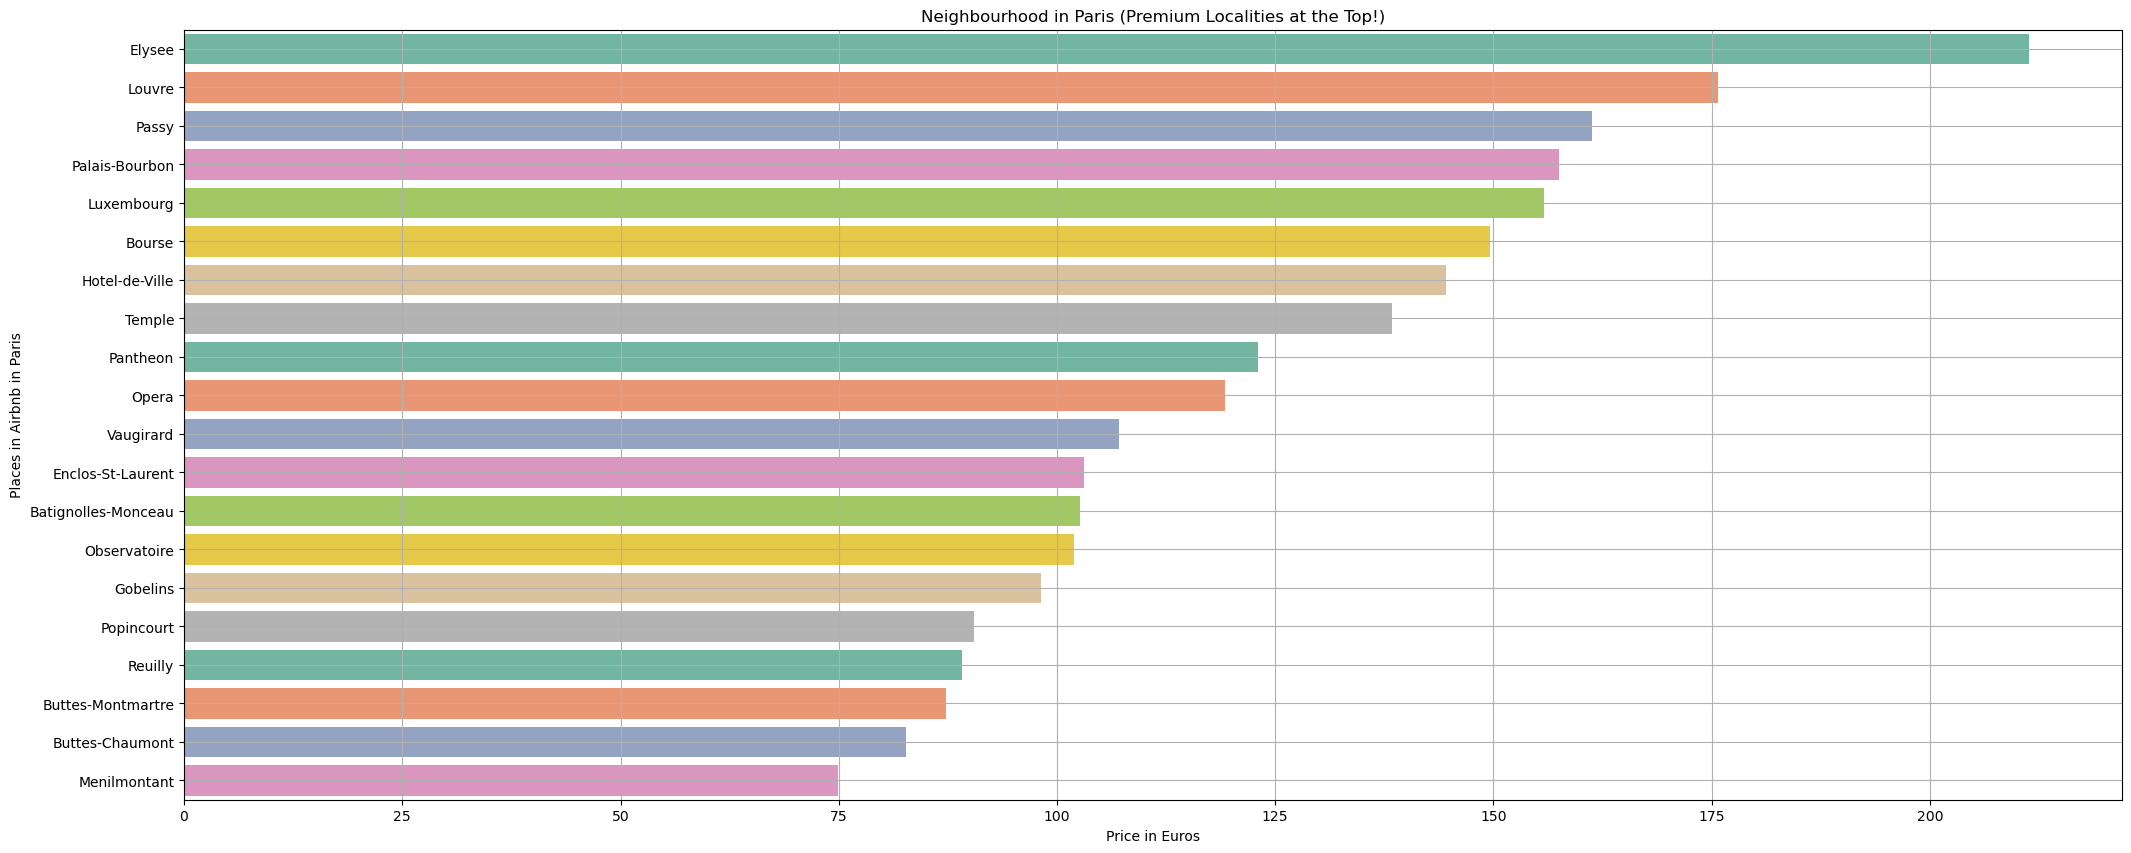

In [214]:
plt.figure(figsize=(25,10))
sns.barplot(data=paris_listings_neighbourhood,x="price",
            y=paris_listings_neighbourhood.index,
             palette="Set2",color="#00a699")
plt.title("Neighbourhood in Paris (Premium Localities at the Top!)")
plt.xlabel("Price in Euros")
plt.ylabel("Places in Airbnb in Paris")
plt.grid(True)
plt.show()


 Inside of Paris,the price of AirBnB is directly impacted by the popularity of the tourist place or
 the view of Eiffel tower. We need to further see if the prices are increasing when the regulations are imposed

In [215]:
paris_listings_accommodates=paris_listings.groupby("accommodates").agg({"price":"mean"}).sort_values("price",ascending=False)

In [216]:
paris_listings_accommodates

,price
accommodates,
15,928.416667
12,821.434211
13,704.578947
14,699.230769
11,680.911765
16,677.060606
10,585.756219
9,381.900000
8,325.022440


### Possible reasons for this trend
1. Owners of properties with 16 people might face occupancy issues due to less number of large groups.
2. The ones with 14 people might be a sweet spot for a group having two families travelling.
3. There is possibility that more than 16 and 12 occupancy properties are away from hotspots in Elysee.
4. There might be potential outliers in 11 and 14 occupancy properties which are skewing the trend.

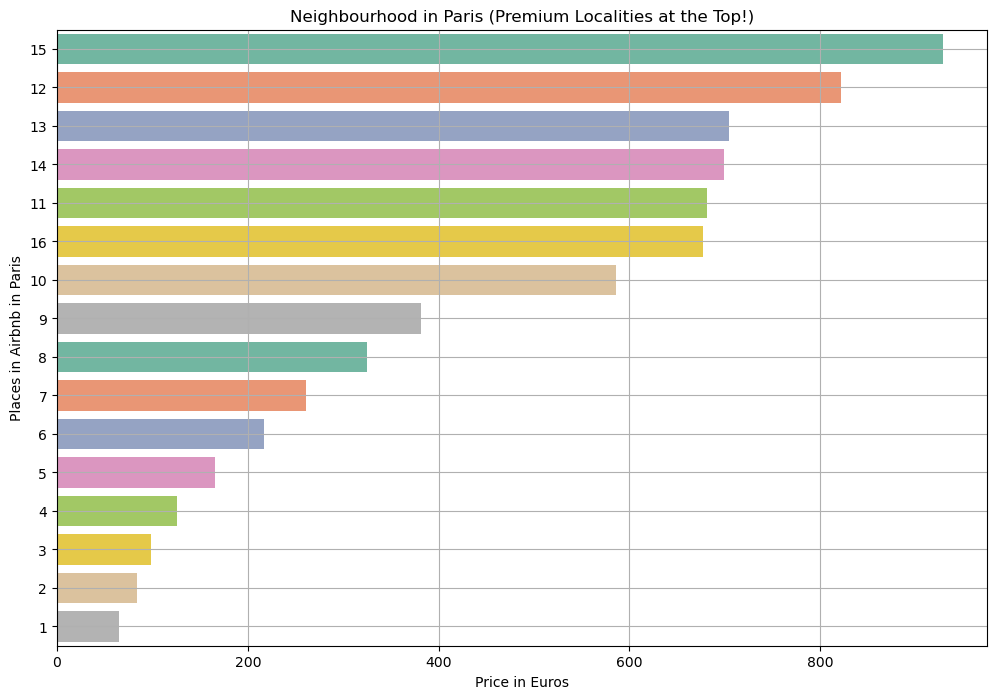

In [217]:
plt.figure(figsize=(12,8))
sns.barplot(data=paris_listings_accommodates,x="price",
            y=paris_listings_accommodates.index,
            order=paris_listings_accommodates.index,
            orient="h",
             palette="Set2",color="#314a48")
plt.title("Neighbourhood in Paris (Premium Localities at the Top!)")
plt.xlabel("Price in Euros")
plt.ylabel("Places in Airbnb in Paris")
plt.grid(True)
plt.show()

Inside of Paris, the price of AirBnBs is directly impacted by the popularity of the tourist place or 
 the view of Eiffel tower. We need to further see if the prices are increasing when the regulations are imposed.


In [218]:
paris_listings.head()

,listing_id,host_since,neighbourhood,city,accommodates,price
0,281420,2011-12-03,Buttes-Montmartre,Paris,2,53
1,3705183,2013-11-29,Buttes-Montmartre,Paris,2,120
2,4082273,2014-07-31,Elysee,Paris,2,89
3,4797344,2013-12-17,Vaugirard,Paris,2,58
4,4823489,2014-12-14,Passy,Paris,2,60


In [219]:
paris_listings["year_of_listing"]=paris_listings["host_since"].dt.year

In [220]:
paris_listings.head()

,listing_id,host_since,neighbourhood,city,accommodates,price,year_of_listing
0,281420,2011-12-03,Buttes-Montmartre,Paris,2,53,2011
1,3705183,2013-11-29,Buttes-Montmartre,Paris,2,120,2013
2,4082273,2014-07-31,Elysee,Paris,2,89,2014
3,4797344,2013-12-17,Vaugirard,Paris,2,58,2013
4,4823489,2014-12-14,Passy,Paris,2,60,2014


<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Finding popularity of AirBnB over time</strong></h1>
</div>

In [221]:
paris_listings_over_time=paris_listings.groupby("year_of_listing").agg({"listing_id":"count","price":"mean"})

In [222]:
paris_listings_over_time

,listing_id,price
year_of_listing,,
2008,4,77.750000
2009,106,159.641509
2010,416,125.031250
2011,1339,124.828230
2012,4592,111.578615
2013,8142,107.096414
2014,10922,100.253800
2015,12147,103.646250
2016,8867,114.211345


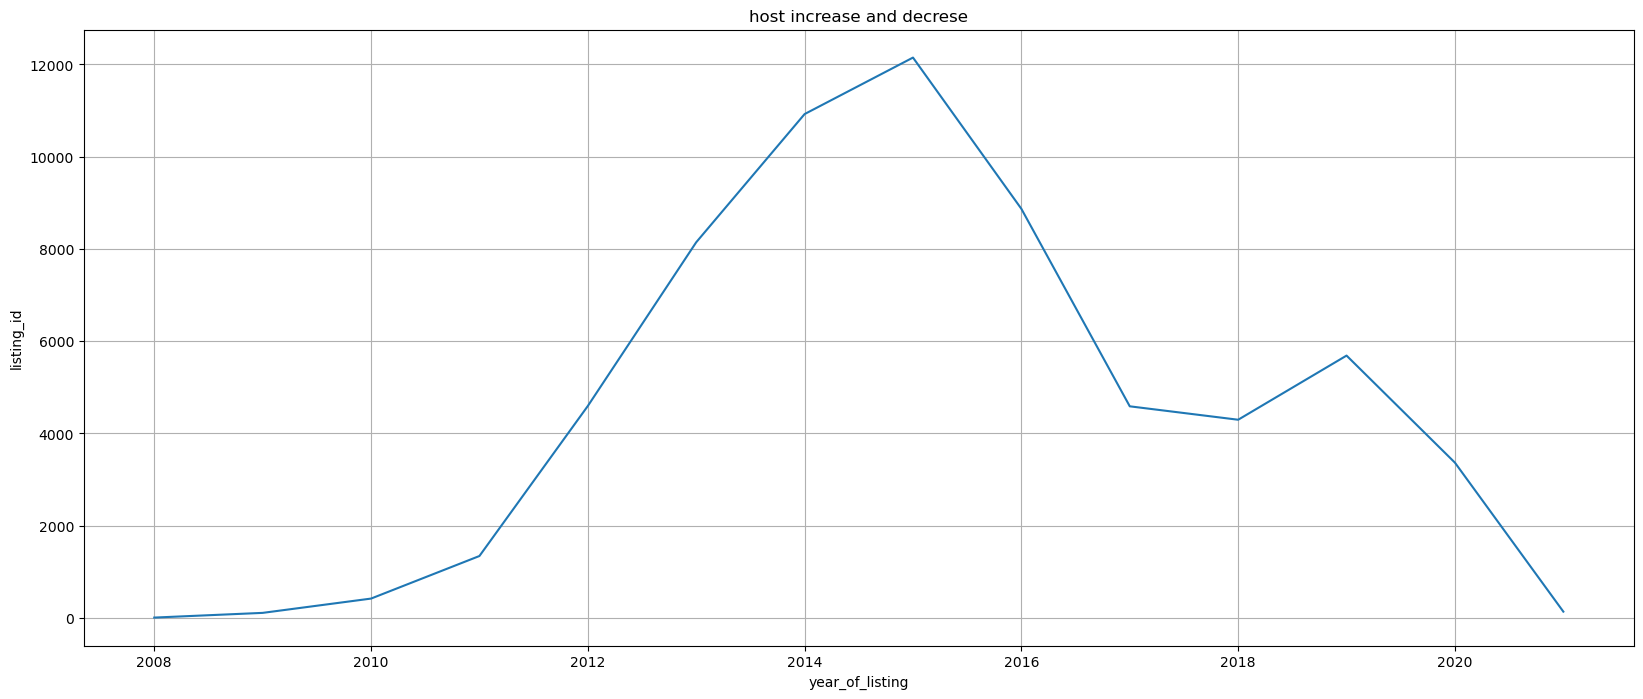

In [223]:
plt.figure(figsize=(20,8))
sns.lineplot(data=paris_listings_over_time["listing_id"],
             palette="Set2")
plt.grid(True)
plt.title("host increase and decrese")
plt.show()

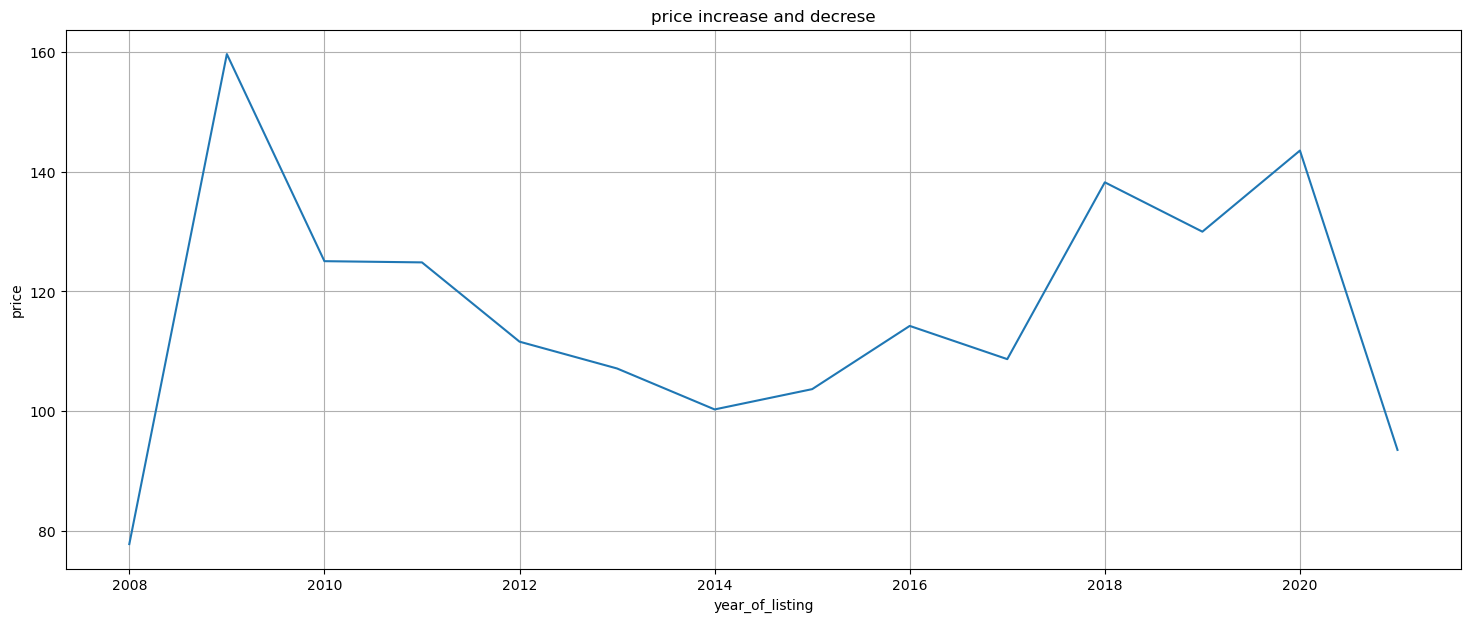

In [224]:
plt.figure(figsize=(18,7))
sns.lineplot(data=paris_listings_over_time["price"],
             palette="Set2")
plt.grid(True)
plt.title("price increase and decrese")
plt.show()

<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Finding effects of Regulations on AirBnB Business</strong></h1>
</div>

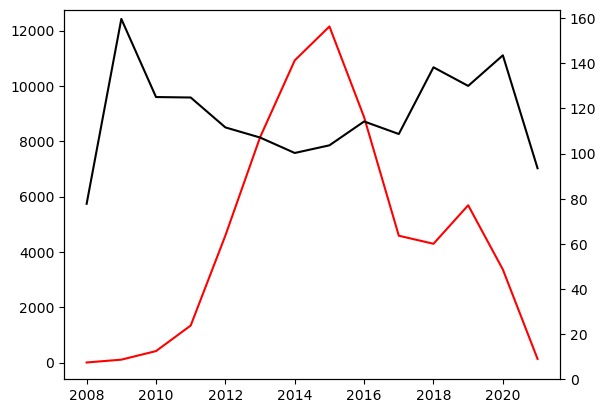

In [225]:
fig,ax =plt.subplots()
ax.plot(paris_listings_over_time.index,paris_listings_over_time["listing_id"],color="red")
ax2=ax.twinx()
ax2.plot(paris_listings_over_time.index,paris_listings_over_time["price"],color="black")
ax2.set_ylim(0)
plt.show()

<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Final Insights</strong></h1>
</div>

1. The Number of AirBnBs kept on increasing since the launch and prices kept on increasing too, due to initial traction and early adopters.
2. After the startup is known to everyone and becomes a common utility, AirBnBs start increasing in numbers and prices also kept on decreasing.
3. After regulation was announced around 2015 there was under confidence in the business, number of AirBnBs started decreasing and prices started increasing.
4. Once the regulation is the new normal, during the year 2019 the number of AirBnBs have increased in number and prices kept decreasing due to more supply of them.

<div style="background-color: #f09013ff; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Recommendation for AirBnB</strong></h1>
</div>

1. Regulations in long term rentals can impact the business adversely, there might be customer and hosts churn due to uncertainty.
2. Such regulations might add to AirBnBs losses which might be difficult to recover later.
3. If the customer experience is going to get impacted due to this, it would lead to incorrect brand perception.
4. It is recommended to watch out for any such regulations at other places and be prepared for it.
5. AirBnB can replicate such regulations at other places.
6. They can keep strict rules to onboard and release the hosts.
7. They can limit the number of AirBnBs in a locality to ensure the public has enough rental options and the government doesn't step in.